In [1]:
import os

In [2]:
os.chdir('/Users/uliaprohodceva/Downloads/Проект')#меняю рабочую директорию и смотрю, какие файлы в ней находятся
print(os.listdir())

['.DS_Store', 'Le Mythe de Sisyphe_Albert Camus.txt', 'vectors.csv', "L'Être et le Néant Sartre.txt", 'La nausée Sartre.txt', 'output3.png', 'топ-30 биграмм.csv', 'output1.png', 'La Peste_Albert Camus.txt', 'output6.png', 'Частоты_Сартр.csv', 'output.png', 'Частоты_Камю.csv', 'Sartre_Camus_Project.ipynb', "L'Étranger_Albert Camus.txt", 'Lexistentialisme est un humanisme Sartre.txt', 'heatmap.png', 'wordcloud.png']


In [3]:
for i in os.listdir('/Users/uliaprohodceva/Downloads/Проект'): #проверяю, читаются ли нужные файлы
     with open(i, 'r', encoding='utf-8') as f:
        if i.endswith(".txt"): #чтобы не захватывать скрытый файл '.DS_Store' в папке
            text = f.read()
            print(text[:100])

LE MYTHE DE SISYPHE 


Essai sur l’absurde 
ALBERT CAMUS 


INTERNET ARCHIVE 
Edition numérique 


2
SARTRE 


l'être et le néant 


Essai d'ontologie 
phénoménologique 


LOT saircre 


Jean-Paul Sart
Sartre La nausée 



Texte intégral 



COLLECTION FOLIO 




Jean-Paul Sartre 


La nausée 


Galli
















Albert Camus 


IA PESTE 

( 1947 ) 



Il est aussi raisonnable de représenter une 










Albert Camus 


L’ÉTRANGER 

(1942) 



PREMIERE PARTIE 



I 


Aujourd’hui, maman est mo



= 


Bc 


MEO LEECTION PENSÉES 





| 
| JEAN-PAUL SARTRE 
| PEXISTENTIALISME 


est un humanis


In [4]:
corpus_Camus = [] #собираю отдельно корпус из текстов А. Камю
for i in os.listdir('/Users/uliaprohodceva/Downloads/Проект'):
    if i.endswith("Camus.txt"):
        with open(i, 'r', encoding='utf-8') as f:
            corpus_Camus.append(f.read())
    #texts_Camus = " ".join(corpus_Camus) пробовала сначала так, оставила на всякий случай в комментарии для себя

In [5]:
import nltk #все импорты для предобработки 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('french')
from collections import Counter

In [ ]:
#добавляю стоп-слова, сделала отдельной строкой, чтобы проще было добавлять далее при необходимости 
stop_words = stop_words + ['a','plus','peu','cela','cette','cet', 'très','parce','comme','si','alors','sans','tout','là','encore','où','ou','aussi','oui','puis','dit','bien','fait','quand','toujours','vers','peut','deux','dire','tous','faire','dont','toute','après','ainsi','faut','non','toutes','pouvait','chose','ici', 'quelques','devant','quelque','toujours','seulement','jamais','autre','fois','tant','ni','entre','en','car','leurs','celui','donc','tel','chaque','pourquoi','à','aujourd','hui','pendant','lequel','tant','sous']

In [7]:
#создаю функцию для приведения корпуса к нижнему регистру, токенизации и удалении пунктуации и стоп-слов
def clean_tokens(text):
  text = text.lower()
  text_list_nltk = word_tokenize(text)
  text_without_punkt = [word for word in text_list_nltk if word.isalpha()] #чтобы не захватывались цифры 
  text_clean = [word for word in text_without_punkt if word not in stop_words]
  return text_clean

In [8]:
clean_corpus_Camus = [] #очищаю корпус
for i in corpus_Camus:
    clean_corpus_Camus.append(clean_tokens(i))

In [9]:
clean_corpus_Camus2 = [] #собранный корпус получился списком списков, поэтому далее при использовании Counter возникла ошибка, пришлось пересобрать в один список
for sublist in clean_corpus_Camus:
    for word in sublist:
        clean_corpus_Camus2.append(word)

In [10]:
texts_clean_Camus = " ".join(clean_corpus_Camus2) #соединила в один текст, лемматизатор выдавал ошибку при попытках работы со списком
print(texts_clean_Camus[:200])

mythe sisyphe essai absurde albert camus internet archive edition numérique avertissement œuvre domaine public philippines œuvre passe domaine public ans mort auteur e respectez loi droits auteur pays


In [11]:
Counter(clean_corpus_Camus2).most_common(20)#смотрю наиболее частотные слова в корпусе, служебные добавляю в список стоп-слов 

[('rieux', 526),
 ('rien', 313),
 ('tarrou', 307),
 ('peste', 292),
 ('temps', 289),
 ('homme', 284),
 ('absurde', 277),
 ('être', 268),
 ('docteur', 264),
 ('moment', 254),
 ('monde', 247),
 ('ville', 245),
 ('vie', 237),
 ('rambert', 205),
 ('grand', 196),
 ('moins', 175),
 ('mort', 154),
 ('cottard', 148),
 ('hommes', 140),
 ('jour', 133)]

In [12]:
import stanza #загружаем библиотеку для лемматизации
stanza.download("fr")
nlp_stanza = stanza.Pipeline(lang="fr", processors="tokenize, pos, lemma")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-21 02:45:08 INFO: Downloaded file to /Users/uliaprohodceva/stanza_resources/resources.json
2025-06-21 02:45:08 INFO: Downloading default packages for language: fr (French) ...
2025-06-21 02:45:09 INFO: File exists: /Users/uliaprohodceva/stanza_resources/fr/default.zip
2025-06-21 02:45:10 INFO: Finished downloading models and saved to /Users/uliaprohodceva/stanza_resources
2025-06-21 02:45:10 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-06-21 02:45:10 INFO: Downloaded file to /Users/uliaprohodceva/stanza_resources/resources.json
2025-06-21 02:45:10

In [13]:
#лемматизирую текст
#text_stanza = nlp_stanza(texts_clean_Camus)
#print(text_stanza) #результат

In [14]:
#функция, чтобы достать только леммы
def lemmatize_text(text):
    print("Начало лемматизации")
    print(f"Тип text: {type(text)}")
    try:
        lemmas = []
        text_stanza = nlp_stanza(text) #обрабатываем текст
        for sentence in text_stanza.iter_tokens(): 
            for token in sentence.words: 
                lemmas.append(token.lemma)
        return lemmas
    except Exception as e:
            print(f"Произошла ошибка: {e}")
            return None

In [15]:
lemmas_Camus = lemmatize_text(texts_clean_Camus)

Начало лемматизации
Тип text: <class 'str'>


In [16]:
print(lemmas_Camus[:30])#проверяю первые 20 лемм
Counter(lemmas_Camus).most_common(30)#20 самых частотных 

['mythe', 'sisyphe', 'essai', 'absurde', 'albert', 'camus', 'internet', 'archive', 'edition', 'numérique', 'avertissement', 'œuvre', 'domaine', 'public', 'philippin', 'œuvre', 'passer', 'domaine', 'public', 'an', 'mort', 'auteur', 'e', 'respecter', 'loi', 'droit', 'auteur', 'pays', 'édition', 'numérique']


[('rieux', 526),
 ('homme', 423),
 ('savoir', 414),
 ('pouvoir', 333),
 ('voir', 315),
 ('rien', 312),
 ('faire', 307),
 ('grand', 306),
 ('tarrou', 305),
 ('vouloir', 301),
 ('peste', 297),
 ('absurde', 292),
 ('temps', 289),
 ('être', 289),
 ('aller', 281),
 ('moment', 265),
 ('docteur', 264),
 ('demander', 256),
 ('jour', 253),
 ('ville', 253),
 ('monde', 251),
 ('vie', 250),
 ('devoir', 235),
 ('parler', 234),
 ('venir', 233),
 ('regarder', 215),
 ('celui', 210),
 ('trouver', 207),
 ('rambert', 205),
 ('donner', 204)]

In [17]:
#собираю леммы в один текст 
# изначально при попытках собрать леммы вместе возникала ошибка "The error TypeError: sequence item 32747: expected str instance, NoneType found", поэтому пришлось удалять элементы со значением None
lemmas_Camus = [item if item is not None else "" for item in lemmas_Camus]
Camus_stanza = ' '.join(lemmas_Camus)
print(Camus_stanza[:200])

mythe sisyphe essai absurde albert camus internet archive edition numérique avertissement œuvre domaine public philippin œuvre passer domaine public an mort auteur e respecter loi droit auteur pays éd


In [18]:
#собираю корпус текстов Ж.-П. Сартра, предобрабатываю и лемматизирую 
corpus_Sartre = [] #собираю отдельно корпус из текстов А. Камю
for i in os.listdir('/Users/uliaprohodceva/Downloads/Проект'):
    if i.endswith("Sartre.txt"):
        with open(i, 'r', encoding='utf-8') as f:
            corpus_Sartre.append(f.read())

In [19]:
clean_corpus_Sartre = [] 
for i in corpus_Sartre:
  clean_corpus_Sartre.append(clean_tokens(i))
clean_corpus_Sartre2 = [] 
for sublist in clean_corpus_Sartre:
  for word in sublist:
    clean_corpus_Sartre2.append(word)
texts_clean_Sartre = " ".join(clean_corpus_Sartre2)

In [20]:
Counter(clean_corpus_Sartre2).most_common(20)

[('être', 3409),
 ('monde', 1409),
 ('conscience', 1407),
 ('sens', 918),
 ('soi', 841),
 ('liberté', 791),
 ('autrui', 740),
 ('effet', 689),
 ('corps', 671),
 ('rien', 669),
 ('objet', 656),
 ('passé', 650),
 ('rapport', 630),
 ('présent', 612),
 ('autres', 503),
 ('temps', 466),
 ('néant', 448),
 ('propre', 445),
 ('point', 435),
 ('négation', 425)]

In [21]:
lemmas_Sartre = lemmatize_text(texts_clean_Sartre)

Начало лемматизации
Тип text: <class 'str'>


In [22]:
lemmas_Sartre = [item if item is not None else "" for item in lemmas_Sartre]
Sartre_stanza = ' '.join(lemmas_Sartre)

In [23]:
Counter(lemmas_Sartre).most_common(20)#проверяю 20 самых частотных 

[('être', 3556),
 ('conscience', 1487),
 ('monde', 1408),
 ('pouvoir', 1179),
 ('voir', 977),
 ('savoir', 921),
 ('sens', 916),
 ('objet', 891),
 ('soi', 840),
 ('passer', 824),
 ('liberté', 792),
 ('donner', 766),
 ('autrui', 739),
 ('présent', 736),
 ('rapport', 725),
 ('devoir', 708),
 ('effet', 702),
 ('rien', 672),
 ('corps', 671),
 ('vouloir', 667)]

In [24]:
#построим облака слов к двум корпусам
from nltk import Text as nltk_text
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker

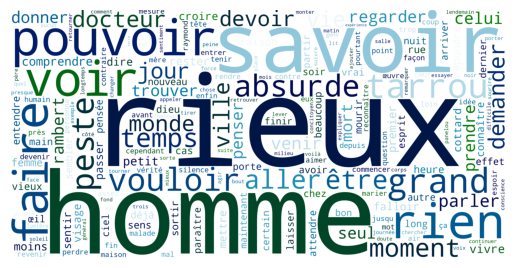

In [25]:
#облако слов для корпуса А. Камю
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='white',
                      margin = 10,
                      colormap='ocean').generate_from_frequencies(Counter(lemmas_Camus))
#plt.figure(figsize=(10, 10)) делала для себя более маштабным облако 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

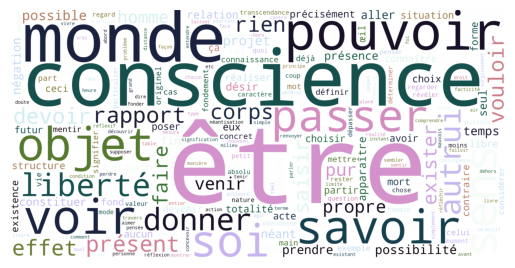

In [26]:
#облако слов для корпуса Ж.-П. Сартра
wordcloud = WordCloud(width = 3000,
                      height = 1500,
                      background_color='white',
                      margin = 10,
                      colormap='cubehelix').generate_from_frequencies(Counter(lemmas_Sartre))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

In [27]:
# создадим датафрейм со словами и их частотностью 
# частотные таблицы - топ-50 частотных лемм в двух корпусах + добавляем частеречную разметку
from nltk.probability import FreqDist

In [28]:
corpus_general = [Camus_stanza, Sartre_stanza] #соединим два лемматизированных корпуса в один

In [29]:
#кол-во токенов после очистки и лемматизации в обоих корпусах
print(len(lemmas_Camus))
print(len(lemmas_Sartre))

62661
161089


In [30]:
# создаем частотный словарь для каждого корпуса и сортируем его по значению ключа

word_frequencies_Camus = FreqDist(lemmas_Camus)
word_frequencies_Camus = dict(sorted(word_frequencies_Camus.items(), key=lambda item: item[1], reverse=True)) 
word_frequencies_Sartre = FreqDist(lemmas_Sartre)

#word_frequencies_Sartre = dict(sorted(word_frequencies_Sartre.items(), key=lambda item: item[1], reverse=True)) #пришлось закомментрировать, чтобы отрисовать график распределения слов в корпусе


#для себя: 
# print(word_frequencies_Camus.items()) - итерируемый список токенов и частот 
#for token, frequency in word_frequencies_Sartre.items(): #оставила для себя, чтобы не потерять, как итерироваться по обеим записям в кортеже
  #print(token, frequency)

<Axes: title={'center': 'Распределение слов в корпусе текстов Ж.-П. Сартра'}, xlabel='Samples', ylabel='Counts'>

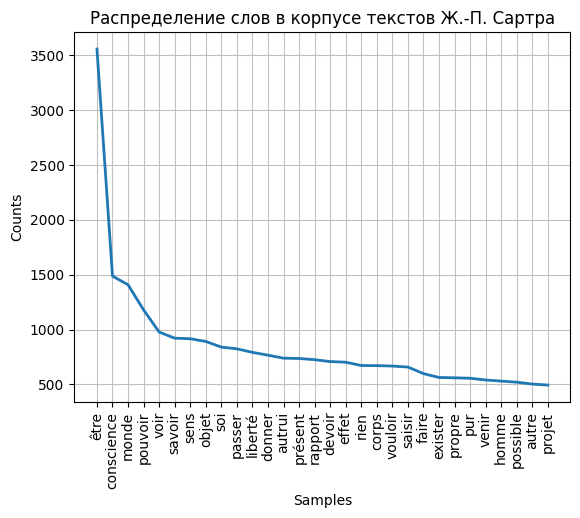

In [31]:
word_frequencies_Sartre.plot(30, title='Распределение слов в корпусе текстов Ж.-П. Сартра') #отрисовала только для одного корпуса, новых выводов из графика получить не удалось, поэтому смысла делать по второму корпусу не увидела

In [32]:
#посчитаем абсолютную и относительную частоту слов в обоих корпусах 

In [33]:
#создадим функцию для частеречной разметки 
def pos_stanza(word):
    doc = nlp_stanza(word)
    return '\n'.join([f'word: {word.text}\tupos: {word.upos}\txpos: {word.xpos}\tfeats: {word.feats if word.feats else "_"}' 
                       for sent in doc.sentences 
                       for word in sent.words])

In [ ]:
# топ-50 частотных лемм в корпусе тектосв А. Камю
table_Camus = pd.DataFrame(word_frequencies_Camus.items(), columns=['слово', 'абсолютная частота'])
table_Camus['часть речи'] = table_Camus['слово'].apply(pos_stanza)
table_Camus ['относительная частота'] = table_Camus ['абсолютная частота'] / len(lemmas_Camus) * 1000000
table_Camus ['относительная частота в общем корпусе '] = table_Camus['абсолютная частота'] / len(corpus_general) #относительная частота в общем корпусе
table_Camus .head(50)

,слово,абсолютная частота,часть речи,относительная частота,относительная частота в общем корпусе
0,rieux,526,word: rieux\tupos: NOUN\txpos: None\tfeats: Ge...,8394.376087,263.0
1,homme,423,word: homme\tupos: NOUN\txpos: None\tfeats: Ge...,6750.610428,211.5
2,savoir,414,word: savoir\tupos: VERB\txpos: None\tfeats: V...,6606.980418,207.0
3,pouvoir,333,word: pouvoir\tupos: NOUN\txpos: None\tfeats: ...,5314.310337,166.5
4,voir,315,word: voir\tupos: VERB\txpos: None\tfeats: Ver...,5027.050318,157.5
5,rien,312,word: rien\tupos: PRON\txpos: None\tfeats: Gen...,4979.173649,156.0
6,faire,307,word: faire\tupos: VERB\txpos: None\tfeats: Ve...,4899.379199,153.5
7,grand,306,word: grand\tupos: ADJ\txpos: None\tfeats: Gen...,4883.420309,153.0
8,tarrou,305,word: tarrou\tupos: NOUN\txpos: None\tfeats: G...,4867.461419,152.5
9,vouloir,301,word: vouloir\tupos: VERB\txpos: None\tfeats: ...,4803.625860,150.5


In [35]:
#table_Camus.to_csv("Частоты_Камю.csv", encoding='utf-8') #сохраним таблицу

In [ ]:
# топ-50 частотных лемм в корпусе тектосв Ж.-П. Сартра
word_frequencies_Sartre = dict(sorted(word_frequencies_Sartre.items(), key=lambda item: item[1], reverse=True))
table_Sartre = pd.DataFrame(word_frequencies_Sartre.items(), columns=['слово', 'абсолютная частота'])
table_Sartre ['часть речи'] = table_Sartre ['слово'].apply(pos_stanza)
table_Sartre ['относительная частота'] = table_Sartre ['абсолютная частота'] / len(lemmas_Sartre) * 1000000
table_Sartre ['относительная частота в общем корпусе '] = table_Sartre ['абсолютная частота'] / len(corpus_general)
table_Sartre.head(50)

,слово,абсолютная частота,часть речи,относительная частота,относительная частота в общем корпусе
0,être,3556,word: être\tupos: AUX\txpos: None\tfeats: Verb...,22074.753708,1778.0
1,conscience,1487,word: conscience\tupos: NOUN\txpos: None\tfeat...,9230.922037,743.5
2,monde,1408,word: monde\tupos: NOUN\txpos: None\tfeats: Ge...,8740.509904,704.0
3,pouvoir,1179,word: pouvoir\tupos: NOUN\txpos: None\tfeats: ...,7318.935495,589.5
4,voir,977,word: voir\tupos: VERB\txpos: None\tfeats: Ver...,6064.970296,488.5
5,savoir,921,word: savoir\tupos: VERB\txpos: None\tfeats: V...,5717.336379,460.5
6,sens,916,word: sens\tupos: NOUN\txpos: None\tfeats: Gen...,5686.297637,458.0
7,objet,891,word: objet\tupos: NOUN\txpos: None\tfeats: Ge...,5531.103924,445.5
8,soi,840,word: soi\tupos: PRON\txpos: None\tfeats: Emph...,5214.508750,420.0
9,passer,824,word: passer\tupos: VERB\txpos: None\tfeats: V...,5115.184774,412.0


In [37]:
#table_Sartre.to_csv("Частоты_Сартр.csv", encoding='utf-8') #сохраним таблицу

In [38]:
#выделим топ-30 биграмм в корпусах
bigramms_Camus = nltk.bigrams(lemmas_Camus) 
bigramms_Sartre = nltk.bigrams(lemmas_Sartre) 
top30_Camus = Counter(bigramms_Camus).most_common(30)
top30_Sartre = Counter(bigramms_Sartre).most_common(30)
camus_bigrams = [bigram for bigram, count in top30_Camus] #перебираем списки top30_Camus и top30_Sartre и достаем сами биграммы, на этом моменте пришлось обратиться к ChatGPT за помощью, так как сама долго не могла понять причину ошибки 
sartre_bigrams = [bigram for bigram, count in top30_Sartre]
df_bigramms = pd.DataFrame({
        'Биграммы корпус Камю': camus_bigrams,
        'Биграммы корпус Сартр': sartre_bigrams,
    })
df_bigramms
#df_bigramms.to_csv("топ-30 биграмм.csv", encoding='utf-8')

,Биграммы корпус Камю,Биграммы корпус Сартр
0,"(docteur, rieux)","(devoir, être)"
1,"(homme, absurde)","(être, être)"
2,"(don, juan)","(mauvais, foi)"
3,"(devoir, être)","(savoir, être)"
4,"(pouvoir, être)","(pouvoir, être)"
5,"(partir, moment)","(point, voir)"
6,"(vouloir, savoir)","(conscience, conscience)"
7,"(savoir, rien)","(conscience, soi)"
8,"(petit, vieux)","(milieu, monde)"
9,"(laisser, aller)","(point, vue)"


In [39]:
#используем tf-idf для сравнения корпусов

In [40]:
# Создаём модель мешка слов
from sklearn.feature_extraction.text import CountVectorizer #импорт функции, которая создаст вектора мешка слов
vectorizer = CountVectorizer() #сохраним в переменную
X = vectorizer.fit_transform(corpus_general) #fit transform cоздает модель мешка слов
vectorizer.get_feature_names_out() #получим список уникальных слов, который входит в мешок слов
len(vectorizer.get_feature_names_out()) #количество уникальных лемм в нашей модели
#print(list(vectorizer.get_feature_names_out())) #список уникальных лемм в нашей модели
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 9, 2, ..., 1, 2, 1]], shape=(2, 14871))

In [41]:
#вектора наших корпусов
text_vector = pd.DataFrame(columns = vectorizer.get_feature_names_out(), data = X.toarray()) 
text_vector

,aa,ab,abaissement,abaisser,abandon,abandonner,abandonnion,abandônner,abasourdi,abattement,...,œi,œil,œillère,œuf,œuvrant,œuvre,œuvrer,œux,œæ,œïncide
0,0,0,0,0,5,14,0,0,1,1,...,0,118,1,1,0,100,0,0,0,0
1,1,9,2,1,5,37,1,1,0,0,...,1,305,0,5,1,42,2,1,2,1


In [42]:
#посчитаем косинусное растояние
from sklearn.metrics.pairwise import cosine_similarity
vector_1 = [X.toarray()[0]]
vector_2 = [X.toarray()[1]]
cosine_similarity(vector_1, vector_2)

array([[0.59115612]])

In [43]:
import seaborn as sns

[[np.float64(1.0000000000000089), np.float64(0.591156123305062)], [np.float64(0.591156123305062), np.float64(0.999999999999995)]]


<Axes: >

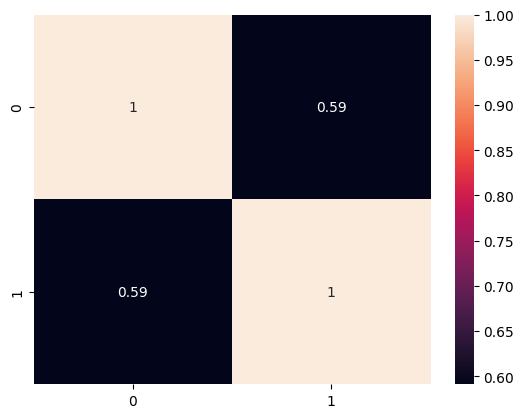

In [44]:
matrix = [] #пыталась отрисовать heatmap для корпусов, но сложность оказалась в интерпретации графика, поэтому оставила закомментированным, так как каких-то выводов у меня не получилось сделать
for index in range(len(text_vector)):
    counter = 0
    max = len(text_vector)
   # print(index)
    vector = []
    while counter < max:
        vector_1 = [X.toarray()[index]]
        #print(vector_1)
        vector_2 = [X.toarray()[counter]]
        #print(vector_2)
        counter += 1      
        vector.append(cosine_similarity(vector_1, vector_2)[0][0])
    matrix.append(vector)
print(matrix)
matrix_alt = cosine_similarity(X.toarray())
sns.heatmap(matrix, annot=True)

In [45]:
#вектора токенов в корпусах
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_general)
tfidf_matrix
npm_tfidf = tfidf_matrix.todense()
corpus_1_vector = npm_tfidf[0] #вектор первого текста
corpus_2_vector = npm_tfidf[1] #вектор второго текста
print(tfidf_vectorizer.get_feature_names_out()) #токены вектора
print(corpus_1_vector)
print(corpus_2_vector)
x_1 = corpus_1_vector.tolist()
x_2 = corpus_2_vector.tolist()
df = pd.DataFrame(data=[x_1[0], x_2[0]], columns=tfidf_vectorizer.get_feature_names_out())
#df.to_csv("vectors.csv", encoding='utf-8')

['aa' 'ab' 'abaissement' ... 'œux' 'œæ' 'œïncide']
[[0. 0. 0. ... 0. 0. 0.]]
[[0.00020159 0.00181434 0.00040319 ... 0.00020159 0.00040319 0.00020159]]


In [46]:
#извлечем ключевые слова для первого корпуса для проверки
#lemmas = list(text_vector.columns)
#tf_idf = text_vector.loc[0].tolist()
#lemmas_tf_idf = list(zip(lemmas, tf_idf))
#lemmas_tf_idf
#отсортируем 
#sorted_corpus = sorted(lemmas_tf_idf, key=lambda x: x[1], reverse = 'True')
#sorted_corpus[:20]

In [47]:
#сравним ключевые слова
lemmas = list(text_vector.columns)
tf_idf_one = text_vector.loc[0].tolist()
tf_idf_two = text_vector.loc[1].tolist()
lemmas_tf_idf_one = list(zip(lemmas, tf_idf_one))
lemmas_tf_idf_two = list(zip(lemmas, tf_idf_two))
sorted_corpus_one = sorted(lemmas_tf_idf_one, key=lambda x: x[1], reverse = True)
sorted_corpus_two = sorted(lemmas_tf_idf_two, key=lambda x: x[1], reverse = True)

In [48]:
sorted_corpus_one[:20]

[('rieux', 526),
 ('homme', 424),
 ('savoir', 415),
 ('pouvoir', 333),
 ('voir', 315),
 ('rien', 313),
 ('faire', 307),
 ('grand', 307),
 ('tarrou', 306),
 ('vouloir', 301),
 ('peste', 299),
 ('absurde', 292),
 ('temps', 289),
 ('être', 289),
 ('aller', 281),
 ('moment', 265),
 ('docteur', 264),
 ('demander', 256),
 ('jour', 253),
 ('ville', 253)]

In [49]:
sorted_corpus_two[:20]

[('être', 3560),
 ('conscience', 1488),
 ('monde', 1411),
 ('pouvoir', 1179),
 ('voir', 977),
 ('savoir', 921),
 ('sens', 918),
 ('objet', 891),
 ('soi', 841),
 ('passer', 824),
 ('liberté', 794),
 ('donner', 766),
 ('autrui', 740),
 ('présent', 737),
 ('rapport', 727),
 ('devoir', 708),
 ('effet', 702),
 ('rien', 672),
 ('corps', 671),
 ('vouloir', 667)]

In [50]:
#построим графики

In [51]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf = tfidf_vectorizer.fit_transform(corpus_general)
words = tfidf_vectorizer.get_feature_names_out()
data = tfidf.todense().tolist()
keywords = pd.DataFrame(data, columns = words)

In [52]:
res = keywords.T
res.columns = ['А. Камю', 'Ж.-П. Сартр']
res

,А. Камю,Ж.-П. Сартр
aa,0.000000,0.000204
ab,0.000000,0.001835
abaissement,0.000000,0.000408
abaisser,0.000000,0.000204
abandon,0.002197,0.000725
...,...,...
œuvre,0.043941,0.006092
œuvrer,0.000000,0.000408
œux,0.000000,0.000204
œæ,0.000000,0.000408


In [53]:
#plt.figure(figsize=(10, 5))
#plt.scatter(res['А. Камю'], res['Ж.-П. Сартр'])
#plt.xlabel('А. Камю', fontsize=12)
#plt.ylabel('Ж.-П. Сартр', fontsize=12)

In [54]:
#plt.figure(figsize=(10, 5))
#plt.scatter(res['Ж.-П. Сартр'], res['А. Камю'])
#plt.xlabel('Ж.-П. Сартр', fontsize=12)
#plt.ylabel('А. Камю', fontsize=12)

Text(0, 0.5, 'А. Камю')

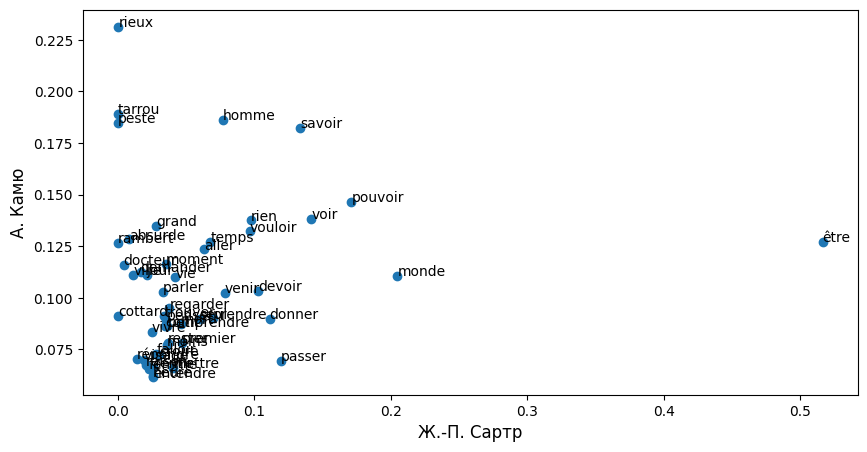

In [55]:
mini = res.sort_values(by=['А. Камю', 'Ж.-П. Сартр'], ascending=False)[:50] # срез

plt.figure(figsize=(10, 5))
plt.scatter(mini['Ж.-П. Сартр'], mini['А. Камю'])

for x_coord, y_coord, label in zip(mini['Ж.-П. Сартр'], mini['А. Камю'], mini.index):
    plt.text(x_coord, y_coord, label)

plt.xlabel('Ж.-П. Сартр', fontsize=12)
plt.ylabel('А. Камю', fontsize=12)

Text(0, 0.5, 'Ж.-П. Сартр')

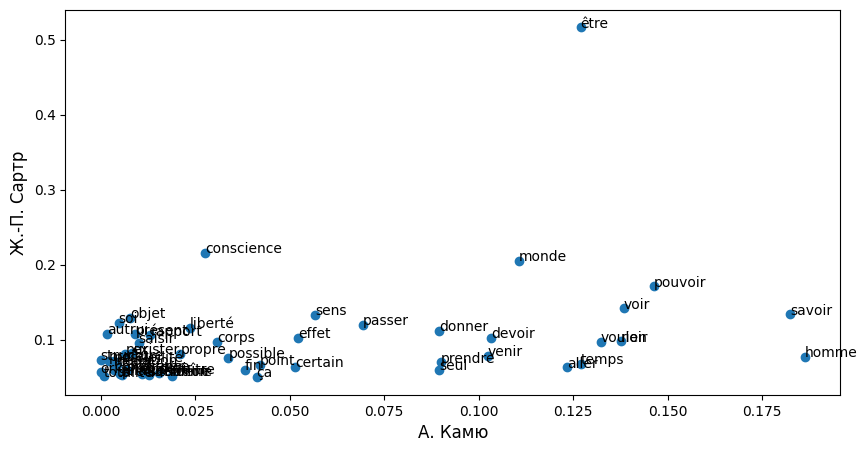

In [56]:
mini = res.sort_values(by=['Ж.-П. Сартр', 'А. Камю'], ascending=False)[:50] # срез

plt.figure(figsize=(10, 5))
plt.scatter(mini['А. Камю'], mini['Ж.-П. Сартр'])

for x_coord, y_coord, label in zip(mini['А. Камю'], mini['Ж.-П. Сартр'], mini.index):
    plt.text(x_coord, y_coord, label)

plt.xlabel('А. Камю', fontsize=12)
plt.ylabel('Ж.-П. Сартр', fontsize=12)